In [2]:
import os
from ModularCirc.Models.KorakianitisMixedModel import KorakianitisMixedModel, KorakianitisMixedModel_parameters, TEMPLATE_TIME_SETUP_DICT
from ModularCirc import BatchRunner
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import pickle
from cvdnet_pipeline.utils import helper_functions, plot_utils

In [3]:
n_samples = 100
n_params = 9
data_type = "synthetic"
output_path = "../output_synthetic"

all_output_keys = [
        "edp",
        "dia",
        "epad",
        "eivc",
        "sys",
        "esp",
        "a_epad",
        "P_max",
        "EF",
        "Ees/Ea",
        "iT",
        "PC1",
        "PC2",
        "PC3"
    ]

calibration_path = "14_output_keys/kf_calibration_results/14_output_keys/calibration_20250924_152801/kf_estimated_means"

# Emulators
emulators= pd.read_pickle(f"{output_path}/output_{n_samples}_{n_params}_params/emulators/linear_models_and_r2_scores_{n_samples}.pkl")

# True imputs
true_inputs = pd.read_csv(f"{output_path}/pure_input_{n_samples}_{n_params}_params.csv")

# True outputs
true_output = pd.read_csv(f"{output_path}/output_{n_samples}_{n_params}_params/waveform_resampled_all_pressure_traces_rv_with_pca.csv")

# Calibrated inputs
calibrated_inputs = pd.read_csv(f"{output_path}/output_{n_samples}_{n_params}_params/kf_calibration_results/{calibration_path}.csv")

# Select emulators and data for specified output_keys
emulator_output = emulators.loc[all_output_keys]
observation_data = true_output.loc[:, all_output_keys] 

# Model error (RMSE from cross-validation)
model_error = np.array(emulator_output['RMSE']).reshape(14,1)

# Construct beta matrix and intercepts
beta_matrix = []
intercept = []

for _, row_entry in emulator_output.iterrows():
    model = row_entry['Model']
    beta_matrix.append(model.coef_)
    intercept.append(model.intercept_)

beta_matrix = np.array(beta_matrix)
intercept = np.array(intercept).reshape(len(intercept), 1)

# emulator predictions for true inputs
emulator_predictions_true = np.dot(beta_matrix, true_inputs.T) + intercept
emulator_predictions_true = pd.DataFrame(emulator_predictions_true.T, columns=all_output_keys)


# emulator predictions for calibrated inputs
emulator_predictions_calibrated = np.dot(beta_matrix, calibrated_inputs.T) + intercept 
emulator_predictions_calibrated = pd.DataFrame(emulator_predictions_calibrated.T, columns=all_output_keys)


# Plot results
plt.figure(figsize=(15, 10))
for i, key in enumerate(all_output_keys):
    plt.subplot(4, 4, i+1)
    plt.scatter(observation_data[key], emulator_predictions_true[key], label='True Inputs', alpha=0.5, c='blue')
    plt.scatter(observation_data[key], emulator_predictions_calibrated[key], label='Calibrated Inputs', alpha=0.5, c='orange')
    plt.plot([observation_data[key].min(), observation_data[key].max()], 
             [observation_data[key].min(), observation_data[key].max()], 'r--')
    plt.xlabel('Observed')
    plt.ylabel('Predicted')
    plt.title(key)
    plt.legend()
plt.tight_layout()




FileNotFoundError: [Errno 2] No such file or directory: '../output_synthetic/output_100_9_params/kf_calibration_results/14_output_keys/kf_calibration_results/14_output_keys/calibration_20250924_152801/kf_estimated_means.csv'

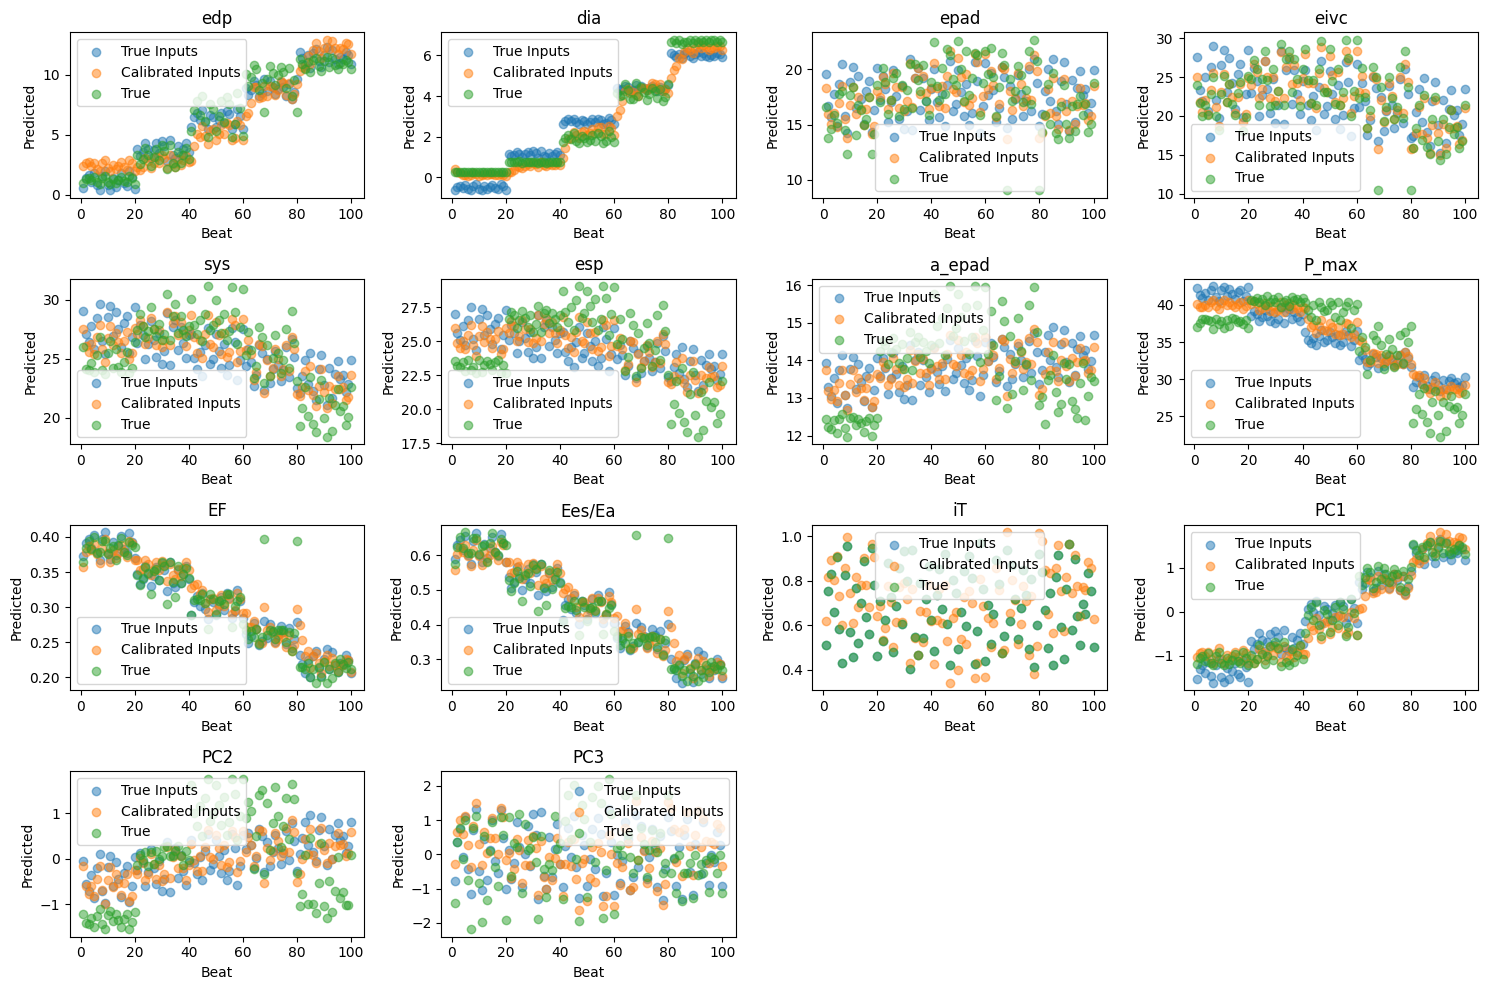

In [ ]:
X = np.arange(1,101)
plt.figure(figsize=(15, 10))
for i, key in enumerate(all_output_keys):
    plt.subplot(4, 4, i+1)
    plt.scatter(X, emulator_predictions_true[key], label='True Inputs', alpha=0.5)
    plt.scatter(X, emulator_predictions_calibrated[key], label='Calibrated Inputs', alpha=0.5)
    plt.scatter(X, observation_data[key], label='True', alpha=0.5)
    plt.xlabel('Beat')
    plt.ylabel('Predicted')
    plt.title(key)
    plt.legend()
plt.tight_layout()

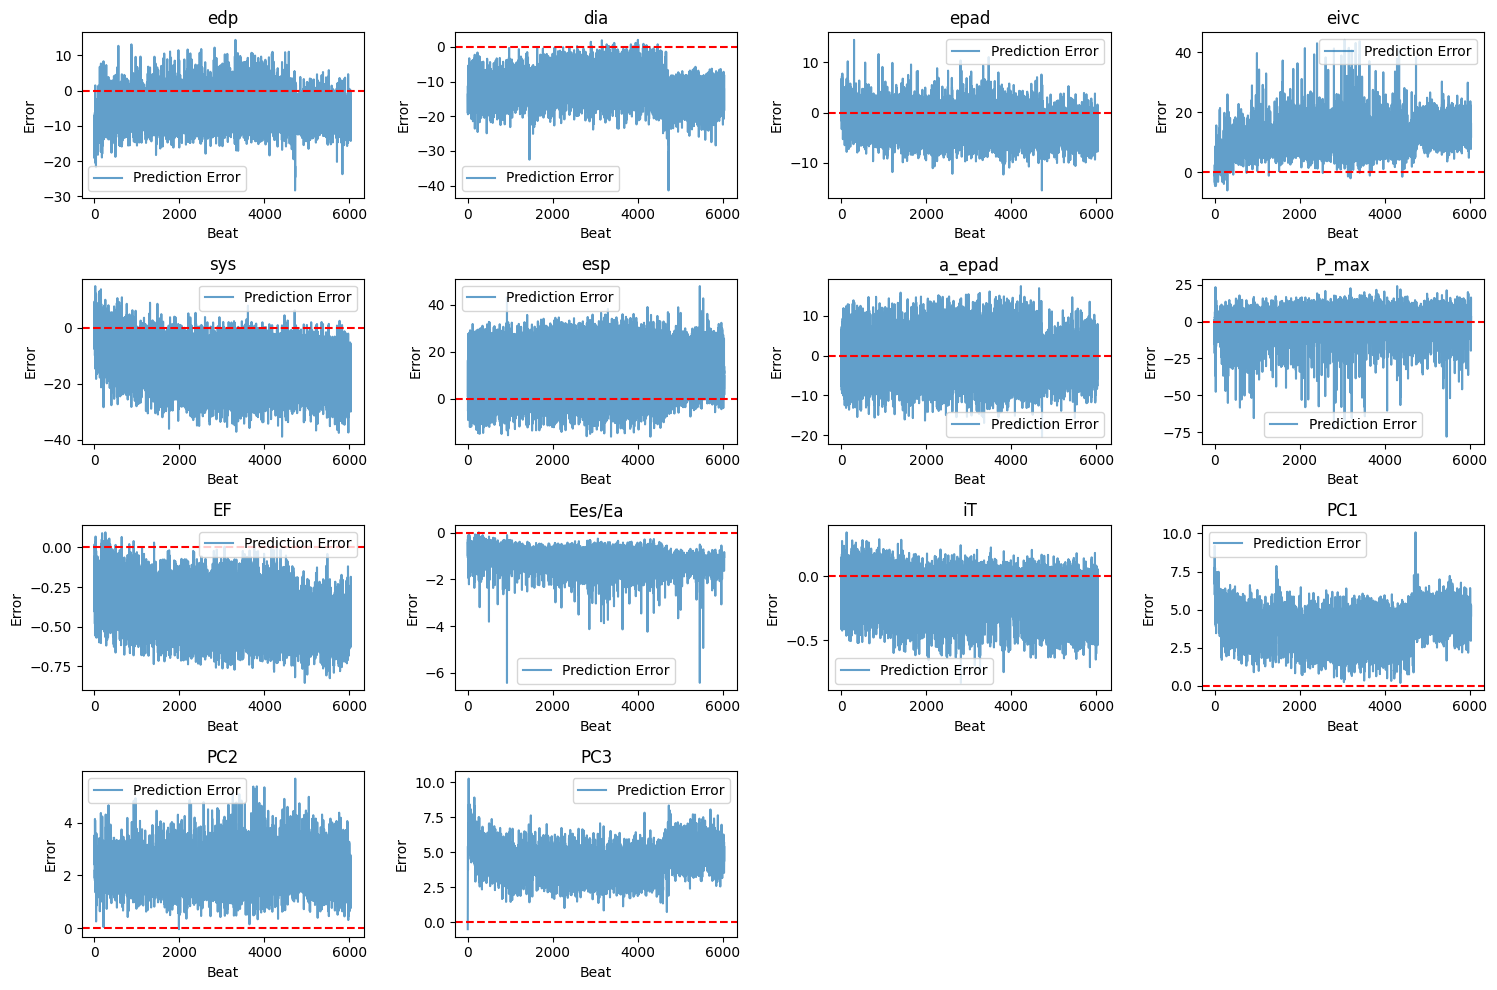

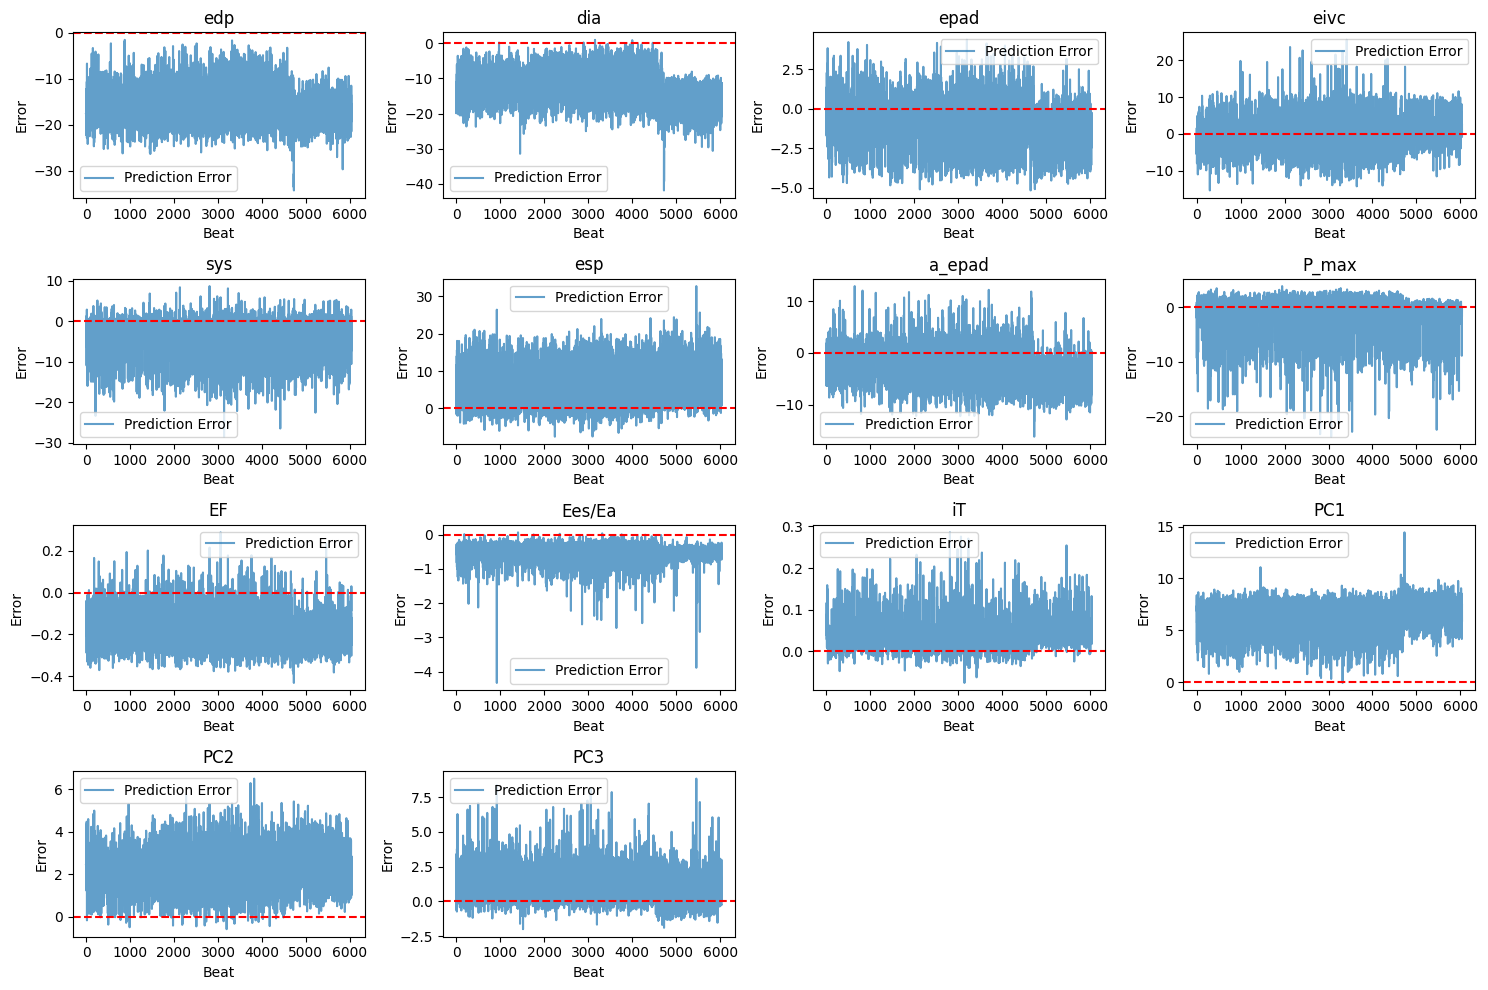

In [91]:
n_samples = 4096
n_params = 8
data_type = "real"
emulator_path = "../output_synthetic"
data_path = "../CohortDataRaw2/output_real/pat_6_night"

all_output_keys = [
        "edp",
        "dia",
        "epad",
        "eivc",
        "sys",
        "esp",
        "a_epad",
        "P_max",
        "EF",
        "Ees/Ea",
        "iT",
        "PC1",
        "PC2",
        "PC3"
    ]

calibration_path_kf = "kf_calibration_results/14_output_keys/kf_calibration_results/14_output_keys/calibration_20251013_115716/kf_estimated_means.csv"
calibration_path_b2b = "bayesian_calibration_results/14_output_keys/calibration_20251013_115715/posterior_mean.csv"

# Emulators
emulators= pd.read_pickle(f"{emulator_path}/output_{n_samples}_{n_params}_params/emulators/linear_models_and_r2_scores_{n_samples}.pkl")


# True output data
true_output = pd.read_csv(f"{data_path}/waveform_resampled_all_pressure_traces_rv_with_pca.csv")

# Calibrated inputs
calibrated_inputs_kf = pd.read_csv(f"{data_path}/{calibration_path_kf}")
calibrated_inputs_b2b = pd.read_csv(f"{data_path}/{calibration_path_b2b}")

# Select emulators and data for specified output_keys
emulator_output = emulators.loc[all_output_keys]
observation_data = true_output.loc[:, all_output_keys] 


# Construct beta matrix and intercepts
beta_matrix = []
intercept = []

for _, row_entry in emulator_output.iterrows():
    model = row_entry['Model']
    beta_matrix.append(model.coef_)
    intercept.append(model.intercept_)

beta_matrix = np.array(beta_matrix)
intercept = np.array(intercept).reshape(len(intercept), 1)


# emulator predictions for calibrated inputs
emulator_predictions_calibrated_kf = np.dot(beta_matrix, calibrated_inputs_kf.T) + intercept 
emulator_predictions_calibrated_kf = pd.DataFrame(emulator_predictions_calibrated_kf.T, columns=all_output_keys)

emulator_predictions_calibrated_b2b = np.dot(beta_matrix, calibrated_inputs_b2b.T) + intercept 
emulator_predictions_calibrated_b2b = pd.DataFrame(emulator_predictions_calibrated_b2b.T, columns=all_output_keys)


# prediction error (between emulator predictions and observed data)
prediction_error_kf = emulator_predictions_calibrated_kf.values - observation_data.values
prediction_error_kf_df = pd.DataFrame(prediction_error_kf, columns=all_output_keys)
prediction_error_b2b = emulator_predictions_calibrated_b2b.values - observation_data.values
prediction_error_b2b_df = pd.DataFrame(prediction_error_b2b, columns=all_output_keys)

# Plot prediction error through time for each output key
plt.figure(figsize=(15, 10))
for i, key in enumerate(all_output_keys):
    plt.subplot(4, 4, i+1)
    plt.plot(prediction_error_kf[:, i], label='Prediction Error', alpha=0.7)
    plt.axhline(0, color='r', linestyle='--')
    plt.xlabel('Beat')
    plt.ylabel('Error')
    plt.title(f'{key}')
    plt.legend()
plt.tight_layout()

plt.figure(figsize=(15, 10))
for i, key in enumerate(all_output_keys):       
    plt.subplot(4, 4, i+1)
    plt.plot(prediction_error_b2b[:, i], label='Prediction Error', alpha=0.7)
    plt.axhline(0, color='r', linestyle='--')
    plt.xlabel('Beat')
    plt.ylabel('Error')
    plt.title(f'{key}')
    plt.legend()
plt.tight_layout()



In [93]:
eigen = beta_matrix.T @ beta_matrix
eigenvalues, eigenvectors = np.linalg.eig(eigen)
eigenvectors[:, -1]



array([ 0.01071469, -0.32728436, -0.80652181,  0.27782803,  0.01826211,
       -0.39743674, -0.01529986, -0.08112183])

In [94]:
prediction_error_kf_df

,edp,dia,epad,eivc,sys,esp,a_epad,P_max,EF,Ees/Ea,iT,PC1,PC2,PC3
0,-17.537260,-13.748867,-0.794953,-0.159275,-1.859083,1.119839,-2.187553,-0.201842,-0.122096,-0.434359,0.054308,6.922194,2.430126,-0.488663
1,-18.861419,-18.532050,-0.323781,-1.093039,2.268088,8.893426,-5.028644,1.007610,-0.192225,-0.547142,0.084603,7.867319,2.638564,1.396149
2,-15.699485,-19.058819,1.278121,-1.164278,2.774254,15.938333,-0.539989,-21.438519,-0.404778,-1.068791,-0.414302,6.679081,2.943328,4.017719
3,-19.179464,-11.288872,-1.042634,-1.082002,-7.613238,-4.733694,-7.564074,1.509192,-0.036803,-0.283649,0.148224,9.180796,3.521193,3.382527
4,-7.260542,-14.221644,5.782224,2.520618,9.455814,16.460455,6.523364,-15.601888,-0.367335,-0.992317,0.009812,5.975342,2.466424,5.425120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6032,-3.301224,-17.099373,-4.923791,7.791667,-21.827466,11.951034,-2.955012,-1.585479,-0.435664,-1.128103,-0.052081,4.213210,0.759352,4.938206
6033,-14.305881,-18.366757,-7.755512,9.013258,-29.954497,10.713018,-5.740830,-5.048600,-0.479809,-1.235302,-0.539476,3.524362,1.211861,5.431526
6034,-4.146148,-13.988302,-1.202751,16.483846,-6.267989,13.794987,7.936550,16.248391,-0.185308,-0.828608,0.056805,4.376836,1.715195,5.162676
6035,-5.268098,-18.281460,-3.287864,12.024484,-18.276728,1.653012,-2.270331,-0.663486,-0.295083,-0.982722,-0.101666,5.288947,2.181656,4.646380


In [95]:
# emu error
emu_error = emulator_output['RMSE']

# observed error
epsilon_obs_scale = 0.05
sd_values = observation_data[all_output_keys].std().values
diagonal_values = sd_values
e_obs = diagonal_values * epsilon_obs_scale

error_values = emu_error**2 + e_obs**2
error_values**(1/2)


edp       0.795653
dia       0.382350
epad      2.150609
eivc      4.670370
sys       2.496224
esp       2.310785
a_epad    1.175299
P_max     3.467014
EF        0.022888
Ees/Ea    0.049888
iT        0.009168
PC1       0.275206
PC2       0.209476
PC3       0.712789
Name: RMSE, dtype: float64

/var/folders/28/nchybyxs1ps5wk3zmnqdpd8r0000gr/T/ipykernel_36355/3377468447.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  error = error_values[i]
/var/folders/28/nchybyxs1ps5wk3zmnqdpd8r0000gr/T/ipykernel_36355/3377468447.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  error = error_values[i]


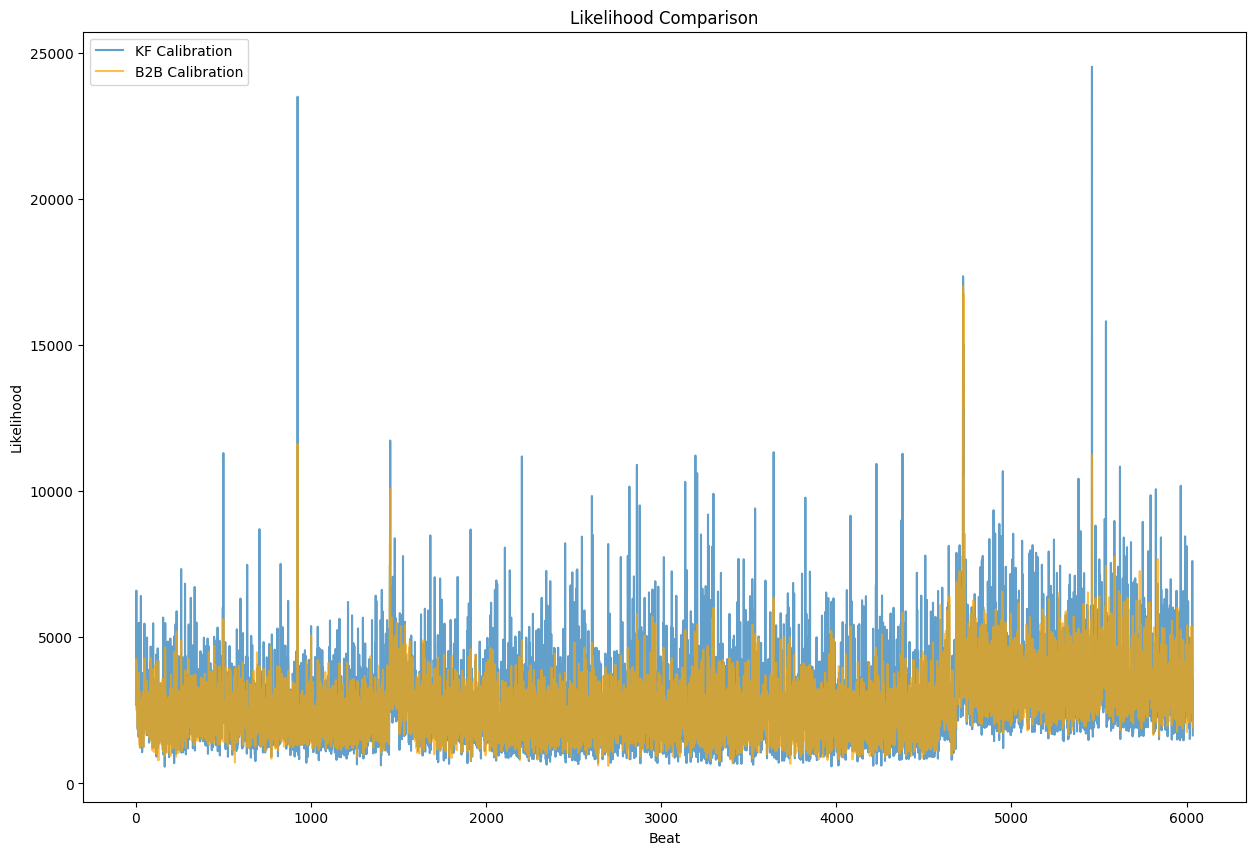

In [96]:
# compute likelihood for each output key for each row
likelihoods_kf= []
for row in range(len(prediction_error_kf_df)):
    likelihood_row = 0
    for i, key in enumerate(all_output_keys):
        error = error_values[i]
        residuals = prediction_error_kf_df.loc[row, key]
        likelihood_row += np.sum((residuals ** 2) / error ) 
    likelihoods_kf.append(likelihood_row)  

likelihoods_b2b= []
for row in range(len(prediction_error_b2b_df)):
    likelihood_row = 0
    for i, key in enumerate(all_output_keys):
        error = error_values[i]
        residuals = prediction_error_b2b_df.loc[row, key]
        likelihood_row += np.sum((residuals ** 2) / error )
    likelihoods_b2b.append(likelihood_row)



# Plot likelihood through time for kf and b2b calibration
plt.figure(figsize=(15, 10))
plt.plot(likelihoods_kf, label='KF Calibration', alpha=0.7)
plt.plot(likelihoods_b2b, label='B2B Calibration', alpha=0.7, color='orange')
plt.xlabel('Beat')
plt.ylabel('Likelihood')
plt.title('Likelihood Comparison')  
plt.legend()